In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [5]:
original_df = pd.read_csv("MinNumLosses.csv")
df = pd.read_csv("MinNumLosses.csv")
# print(len(df))
runtime15=df[df['min_num_losses'] >= 15.0].index
df.drop(runtime15, inplace=True)
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['min_num_losses'].values
train_df, validation_df = train_test_split(train_df, test_size=0.2)
# train_df.reset_index(drop=True)
print(len(train_df))

2636


In [6]:
train_df.describe(include='all')
# print((train_df['runtime'].max())%1 == 0)
print(train_df[(train_df['c_avg_deg_cons'] < 3)])

      c_avg_deg_cons  c_avg_dom_cons  c_avg_domdeg_cons  c_bounds_d  \
3408         2.58036         3.89663            1.48683           0   
3775         2.72000         4.49397            1.61032           0   
4085         2.75266         5.34056            1.85249           0   
2488         2.74844         5.12807            1.78710           0   
2134         2.73497         4.88007            1.71344           0   
2801         2.67249         4.70590            1.68329           0   
766          2.70219         4.90013            1.73119           0   
2759         2.67299         4.58909            1.64696           0   
1798         2.63200         4.30625            1.59297           0   
3438         2.77238         4.50374            1.57556           0   
2031         2.67089         4.35590            1.58879           0   
737          2.70032         4.91406            1.73606           0   
1481         2.72397         5.10368            1.78734           0   
3203  

In [7]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
#     print(lst.reset_index())
#     print(copy_lst[average_feature])
    averages = []
#     print(copy_lst[21])
#     if the features are ints
    if copy_lst[average_feature].max()%1 == 0:
        for value in range(1, copy_lst[average_feature].max()+1):
            value_indices = np.where(copy_lst[average_feature]==value)
            total=0
            for value_index in value_indices[0]:
                total += copy_lst[average_result][value_index]
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
    else:
        for value in range(1, (int(copy_lst[average_feature].max()//1)+3)):
            value_indices_less = np.where((copy_lst[average_feature]<=value))
            value_indices_greater = np.where((copy_lst[average_feature]>value-1))
#             print(copy_lst[average_feature])
#             print(value)
#             print(value_indices_less)
#             print(value_indices_greater)
            value_indices = [np.intersect1d(value_indices_less, value_indices_greater)]
            print(np.average(value_indices[0]))
            total=0
            for value_index in value_indices[0]:
                total += copy_lst[average_result][value_index]
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
        
    return averages

getAverages(train_df, 'c_avg_deg_cons', 'min_num_losses')

nan
nan
1317.5
nan


/home/jack/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/jack/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[3, 2.965857359635812]]

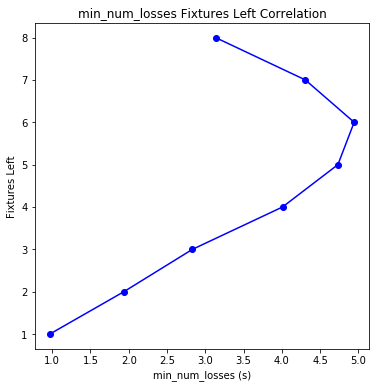

In [8]:
results = getAverages(train_df, 'fixtures_left', 'min_num_losses')
min_num_losses = []
fixtures_left = []
for item in results:
    min_num_losses.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('min_num_losses Fixtures Left Correlation')
plt.plot(min_num_losses, fixtures_left, color='blue', marker='o')
plt.xlabel('min_num_losses (s)')
plt.ylabel('Fixtures Left')
plt.show()

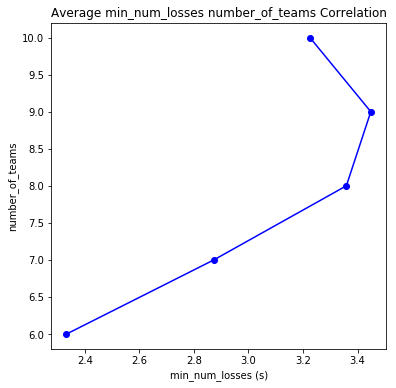

In [9]:
results = getAverages(train_df, 'number_of_teams', 'min_num_losses')
min_num_losses = []
number_of_teams = []
for item in results:
    min_num_losses.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Average min_num_losses number_of_teams Correlation')
plt.plot(min_num_losses, number_of_teams, color='blue', marker='o')
plt.xlabel('min_num_losses (s)')
plt.ylabel('number_of_teams')
plt.show()

In [10]:
train_df = train_df.take(np.random.permutation(len(train_df)))

In [11]:
train_y = train_df['min_num_losses'].values
league_numeric_features = [
 'c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

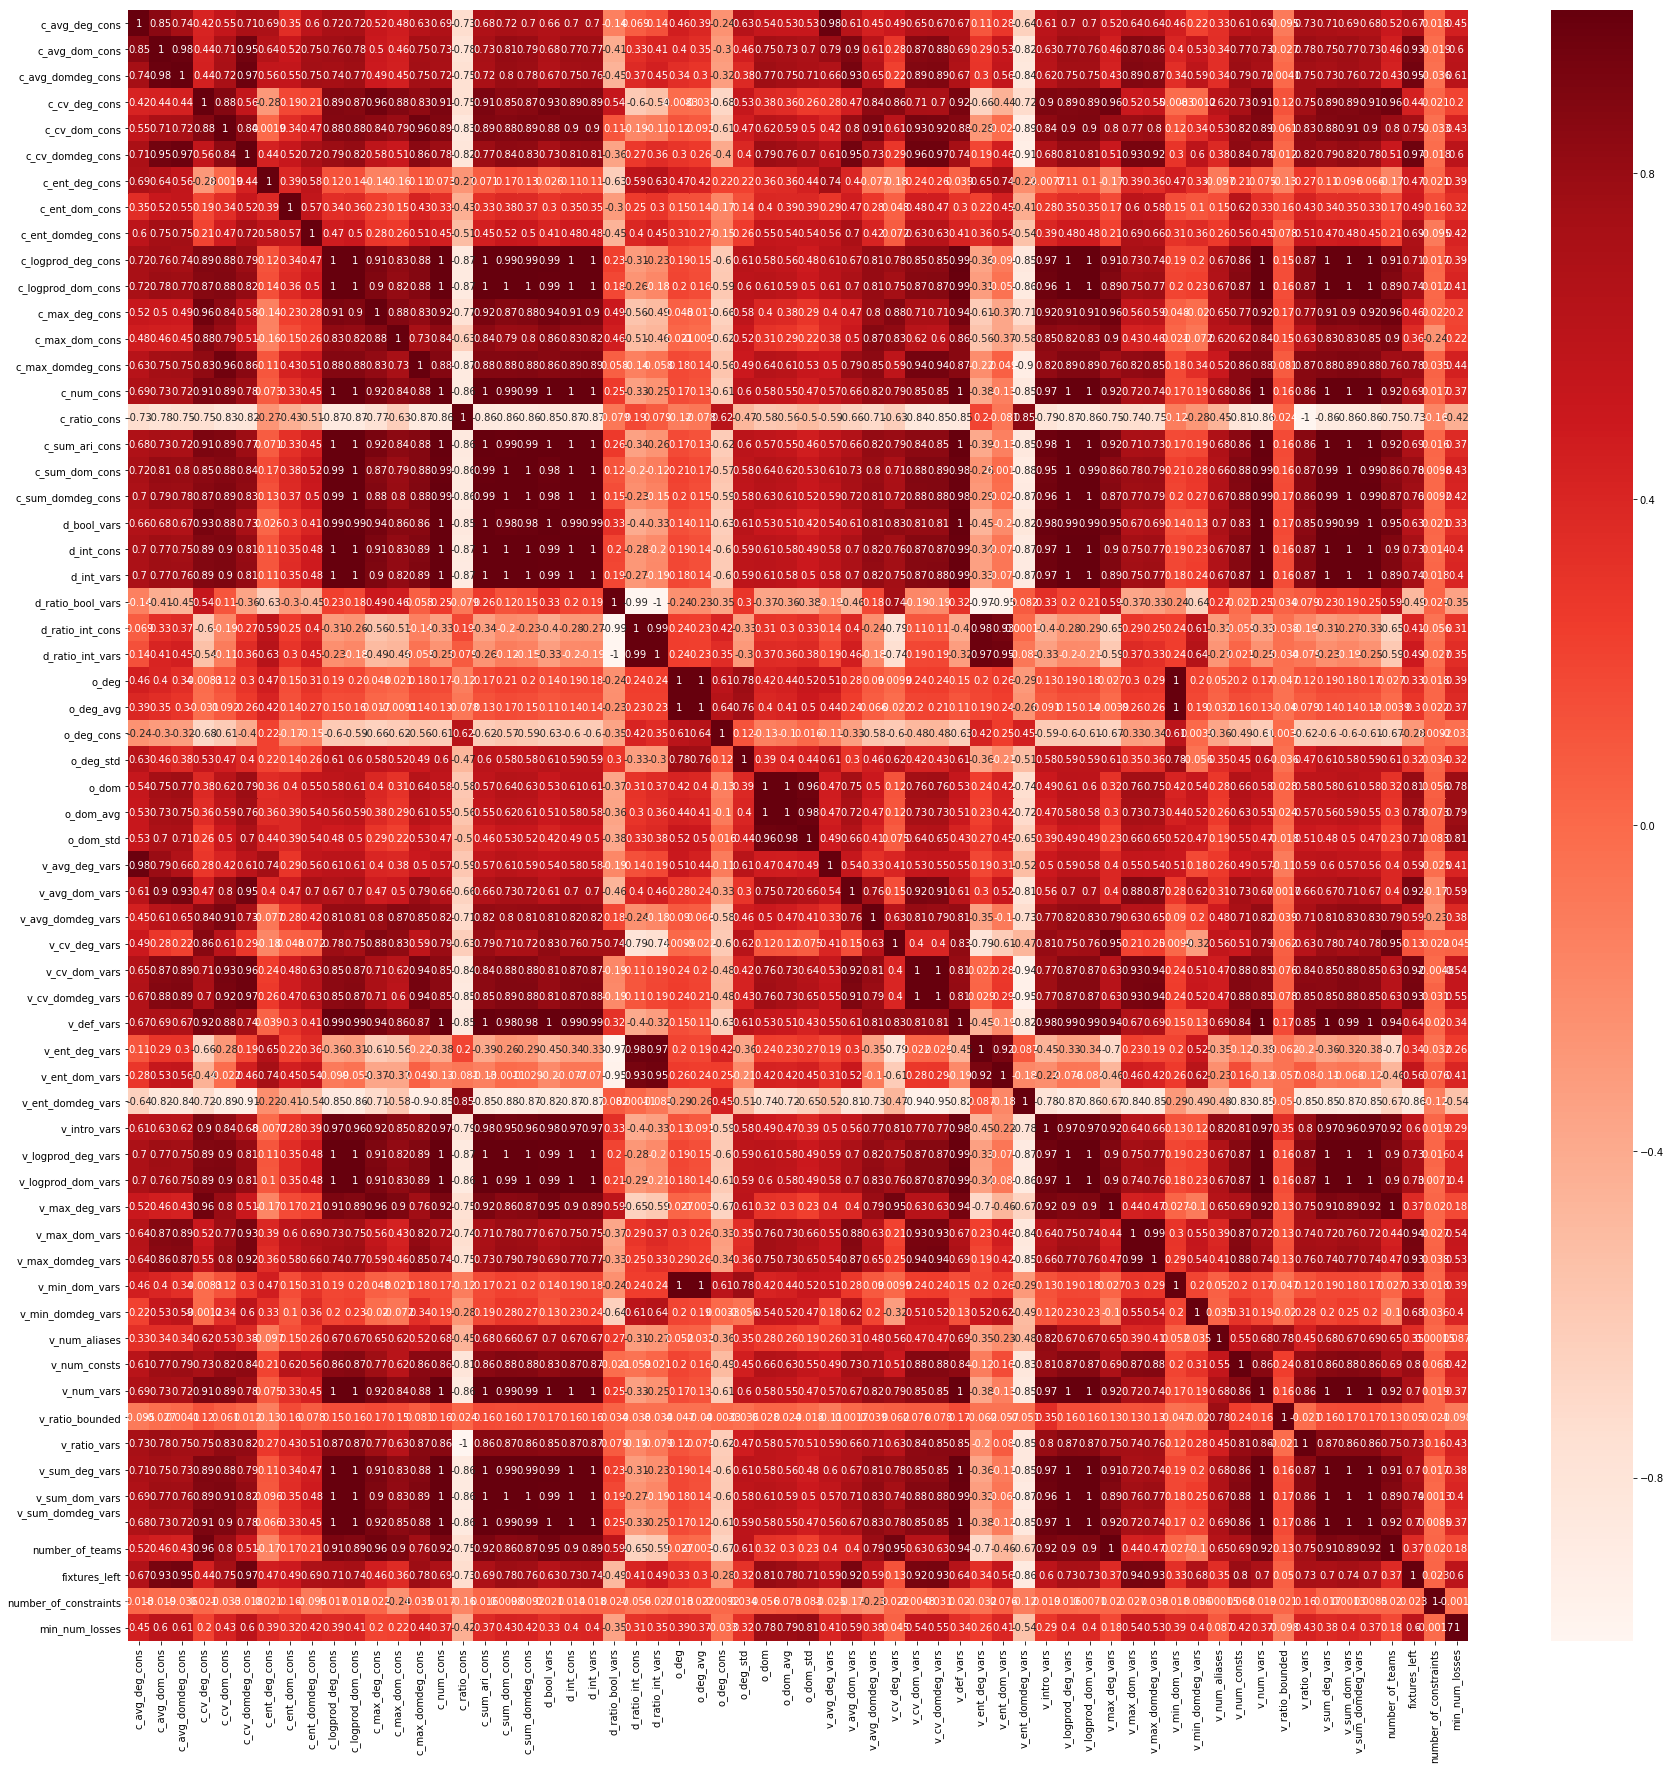

In [12]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = league_numeric_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['min_num_losses'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['min_num_losses']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', LinearRegression())
])

In [14]:
# train_df.isnull().sum()
print([i for i in train_df.columns if train_df[i].isnull().any()])
# train_df.isna().any()

['gc_ratio_diff']


In [15]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', Lasso(alpha=1.0))
])

model = lr.fit(train_df, train_y)

/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608.1021104111637, tolerance: 1.1904927162367223
  positive)


In [16]:
np.mean(cross_val_score(lr, test_df, test_y, scoring='neg_mean_squared_error', cv=10))

/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.00614240590016, tolerance: 0.3377865047233468
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.7685552953345, tolerance: 0.346243994601889
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.6899770237005, tolerance: 0.33996437246963557
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

-2.3354877683211703

/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.00614240590016, tolerance: 0.3377865047233468
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.7685552953345, tolerance: 0.346243994601889
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.6899770237005, tolerance: 0.33996437246963557
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

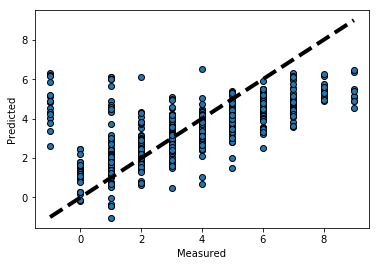

In [17]:
predicted = cross_val_predict(lr, test_df, test_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
# remove 15 second timeouts

In [18]:
np.mean(cross_val_score(lr, test_df, test_y, scoring='r2', cv=10))

/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.00614240590016, tolerance: 0.3377865047233468
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.7685552953345, tolerance: 0.346243994601889
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339.6899770237005, tolerance: 0.33996437246963557
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

0.4877190556476414

In [19]:
np.corrcoef(train_df['fixtures_left'], train_df['min_num_losses'])

array([[1.        , 0.59639621],
       [0.59639621, 1.        ]])

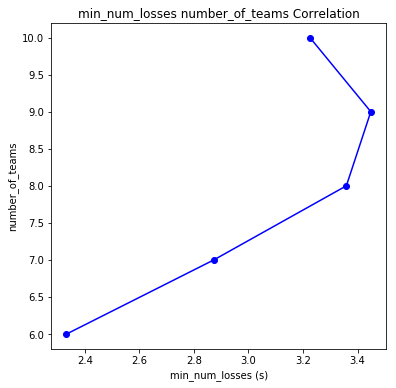

In [20]:
results = getAverages(train_df, 'number_of_teams', 'min_num_losses')
runtime = []
number_of_teams = []
for item in results:
    runtime.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('min_num_losses number_of_teams Correlation')
plt.plot(runtime, number_of_teams, color='blue', marker='o')
plt.xlabel('min_num_losses (s)')
plt.ylabel('number_of_teams')
plt.show()

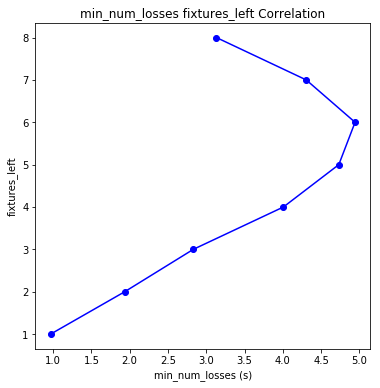

In [21]:
results = getAverages(train_df, 'fixtures_left', 'min_num_losses')
runtime = []
fixtures_left = []
for item in results:
    runtime.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('min_num_losses fixtures_left Correlation')
plt.plot(runtime, fixtures_left, color='blue', marker='o')
plt.xlabel('min_num_losses (s)')
plt.ylabel('fixtures_left')
plt.show()

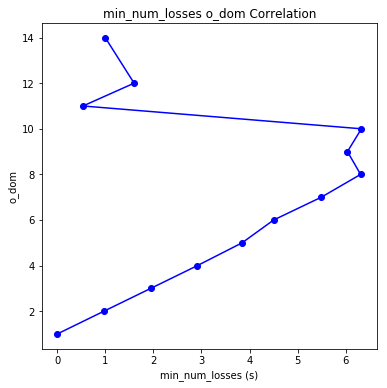

In [22]:
results = getAverages(train_df, 'o_dom', 'min_num_losses')
runtime = []
number_of_constraints = []
for item in results:
    runtime.append(item[1])
    number_of_constraints.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('min_num_losses o_dom Correlation')
plt.plot(runtime, number_of_constraints, color='blue', marker='o')
plt.xlabel('min_num_losses (s)')
plt.ylabel('o_dom')
plt.show()

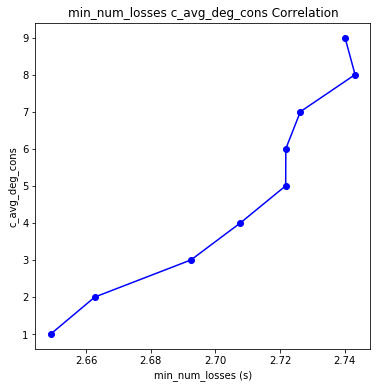

In [26]:
results = getAverages(train_df, 'min_num_losses', 'c_avg_deg_cons')
min_num_losses = []
c_avg_deg_cons = []
for item in results:
    min_num_losses.append(item[1])
    c_avg_deg_cons.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('min_num_losses c_avg_deg_cons Correlation')
plt.plot(min_num_losses, c_avg_deg_cons, color='blue', marker="o")
plt.xlabel('min_num_losses (s)')
plt.ylabel('c_avg_deg_cons')
plt.show()

# print(train_df['c_avg_deg_cons'].max()//1 + 2)

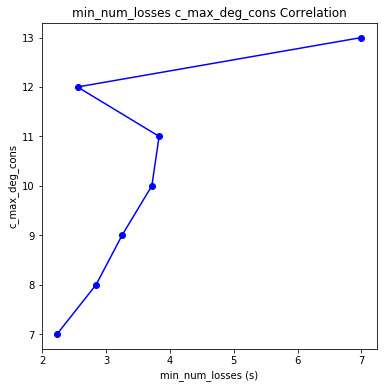

In [178]:
results = getAverages(train_df, 'c_max_deg_cons', 'min_num_losses')
runtime = []
c_max_deg_cons = []
for item in results:
    runtime.append(item[1])
    c_max_deg_cons.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('min_num_losses c_max_deg_cons Correlation')
plt.plot(runtime, c_max_deg_cons, color='blue', marker="o")
plt.xlabel('min_num_losses (s)')
plt.ylabel('c_max_deg_cons')
plt.show()

# print(train_df['c_avg_deg_cons'].max()//1 + 2)

In [179]:
y_predicted = lr.predict(validation_df)
# validation_df.describe(include='all')

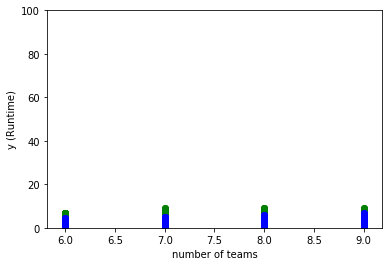

In [180]:
fig = plt.figure()
plt.xlabel('number of teams')
plt.ylabel('y (Runtime)')
plt.ylim(0, 100)
plt.scatter(train_df['number_of_teams'], train_y, color="green")
plt.scatter(validation_df['number_of_teams'], y_predicted, color="blue")
plt.show()